In [31]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [32]:
df = web.DataReader(
    'AAPL',
    data_source= 'yahoo',
    start= '2012-01-01',
    end='2019-12-31',
    retry_count=3,
    pause=0.1,
    session=None,
    api_key=None,
)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.234581
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.628067
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.600876


In [24]:
df.shape

(2012, 6)

<function matplotlib.pyplot.savefig(*args, **kwargs)>

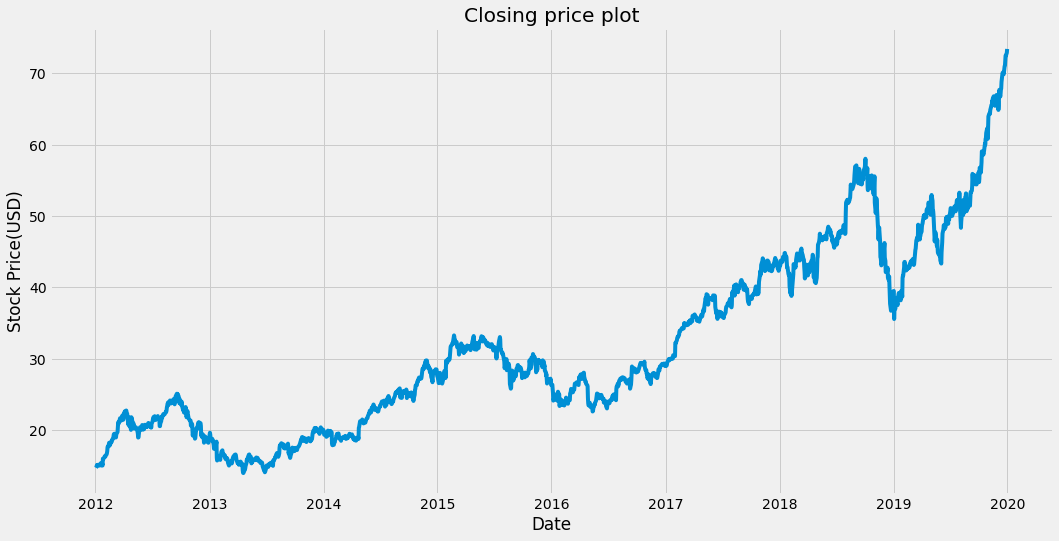

In [33]:
plt.figure(figsize=(16,8))
plt.title('Closing price plot')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price(USD)')
plt.show
plt.savefig

In [41]:
data = df.filter(['Close'])
dataset = data.values
trainX_len = math.ceil(len(dataset)*0.8)
print(data)
print(trainX_len)
print(dataset)

                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
...               ...
2019-12-24  71.067497
2019-12-26  72.477501
2019-12-27  72.449997
2019-12-30  72.879997
2019-12-31  73.412498

[2012 rows x 1 columns]
1610
[[14.6867857 ]
 [14.76571369]
 [14.92964268]
 ...
 [72.44999695]
 [72.87999725]
 [73.41249847]]


In [42]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01243228],
       [0.01375958],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [48]:
train_data = scaled_data[0:trainX_len,:]
print(len(train_data))
train_data

1610


array([[0.01243228],
       [0.01375958],
       [0.01651631],
       ...,
       [0.55734467],
       [0.55646177],
       [0.55826959]])

In [51]:
x_train=[]
y_train=[]
for i in range(60,trainX_len):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if(i<=61):
        print(x_train)
        print(y_train)
        print("----------------------------------------------------------------------")



[array([0.01243228, 0.01375958, 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758536, 0.02052227,
       0.02317089, 0.02235408, 0.01787965, 0.02214988, 0.01794572,
       0.0337113 , 0.03249211, 0.03408368, 0.03752507, 0.03960912,
       0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
       0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
       0.06434759, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
       0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123612,
       0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
       0.09096589, 0.09287577, 0.09697783, 0.10664737, 0.11954812,
       0.11713373, 0.11713972, 0.12646695, 0.12938586, 0.12730777,
       0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876])]
[0.13172814323221588]
----------------------------------------------------------------------
[array([0.01243228, 0.01375958, 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0

In [53]:
x_train , y_train = np.array(x_train), np.array(y_train)
y_train

array([0.13172814, 0.12553604, 0.13699536, ..., 0.55734467, 0.55646177,
       0.55826959])

In [55]:
x_train = np.reshape(x_train,[x_train.shape[0],x_train.shape[1],1])
x_train.shape


(1550, 60, 1)

In [58]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [59]:
model.compile(optimizer='adam',
    loss='mean_squared_error')

In [60]:
model.fit(x_train, y_train,batch_size=1,epochs=1)

1550/1550 [==============================] - 37s 20ms/step - loss: 9.9271e-04


In [74]:
test_data = scaled_data[trainX_len-60: ,:]
print(len(test_data))
x_test=[]
y_test=dataset[trainX_len: ,0]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


462


In [75]:
x_test = np.array(x_test)

In [78]:
x_test = np.reshape(x_test ,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(402, 60, 1)

In [79]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [83]:
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

10.608686995660955

<ipython-input-85-62ff011010d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


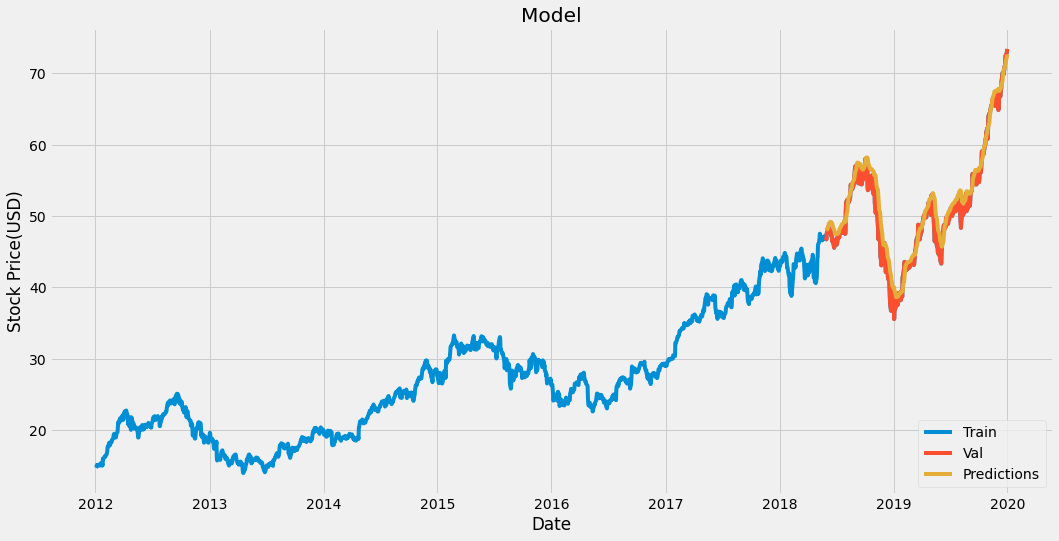

In [85]:
train = data[:trainX_len]
valid = data[trainX_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Stock Price(USD)')
plt.plot(data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [86]:
valid

,Close,Predictions
Date,,
2018-05-29,46.974998,48.054607
2018-05-30,46.875000,48.091469
2018-05-31,46.717499,48.103149
2018-06-01,47.560001,48.083290
2018-06-04,47.957500,48.155758
...,...,...
2019-12-24,71.067497,71.054222
2019-12-26,72.477501,71.358078
2019-12-27,72.449997,71.795982
